In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Load the dataset
df=pd.read_csv('train.csv')

In [35]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
print(correlation_with_target.head(20))  # Top 20 features


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64


In [36]:
selected_features = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
                        '1stFlrSF', 'FullBath', 'YearBuilt',
                        'TotRmsAbvGrd', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea']]
Y = df['SalePrice']


In [55]:
selected_features.isnull().values.any()
# Fill missing values with the mean of each column
selected_features.fillna(selected_features.mean(), inplace=True)

/var/folders/6n/ndsjwkks0kn541czwk8ff3hc0000gn/T/ipykernel_33790/3749276696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.fillna(selected_features.mean(), inplace=True)


In [56]:
X=selected_features

In [57]:
def feature_scaling(X_train, X_test):
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    for col in X_train.columns:
        mean = X_train[col].mean()
        std = X_train[col].std()
        X_train_scaled[col] = (X_train[col] - mean) / (std + 1e-8)
        X_test_scaled[col] = (X_test[col] - mean) / (std + 1e-8)  
    return X_train_scaled, X_test_scaled

In [58]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
X_train_scaled, X_test_scaled = feature_scaling(X_train, X_test)

In [60]:
#for training Data
X_b=np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
# for testing data
X_b_test=np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))
#for weights and bias
theta=np.zeros(X_b.shape[1])

In [61]:
#predictions:
def predict(X, theta):
    return np.dot(X, theta)

In [62]:
#compute
def compute_cost(X,Y,theta):
    n=len(Y)
    prediction=predict(X, theta)
    cost = (1/(2*n)) * np.sum((prediction - Y) ** 2)
    return cost



In [63]:
def GradientDescent(X,Y,theta,learning_rate,epochs):
    n=len(Y)
    cost_history=[]
    for epoch in range(epochs):
        predictions=predict(X,theta)
        errors=predictions-Y
        gradient=(1/n) * np.dot(X.T, errors)
        theta-=learning_rate * gradient
        cost=compute_cost(X, Y, theta)
        cost_history.append(cost)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Cost: {cost:.10f}')
    return theta, cost_history

In [64]:
learning_rate = 0.01
epochs = 1000
theta_final, cost_history = GradientDescent(X_b, y_train, theta, learning_rate, epochs)

Epoch 0, Cost: 18898147172.7213249207
Epoch 100, Cost: 2886543942.9999947548
Epoch 200, Cost: 992700337.7245708704
Epoch 300, Cost: 731857574.0427589417
Epoch 400, Cost: 693259591.6225401163
Epoch 500, Cost: 686090251.8053928614
Epoch 600, Cost: 683962219.5456753969
Epoch 700, Cost: 682951034.5009856224
Epoch 800, Cost: 682338453.4054955244
Epoch 900, Cost: 681928496.7094871998


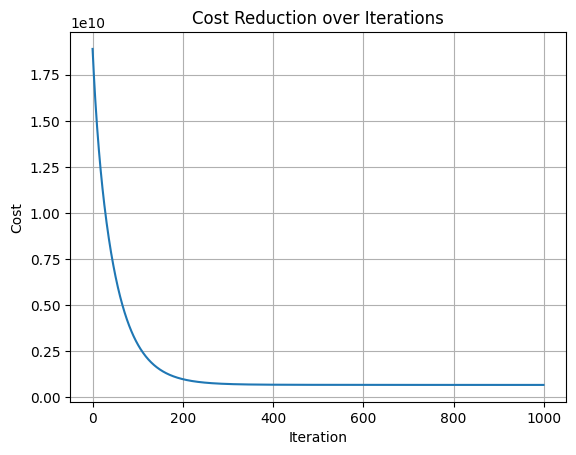

In [65]:
plt.plot(cost_history)
plt.title("Cost Reduction over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


In [69]:
predictions= predict(X_b_test, theta_final)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Test RMSE: {rmse}")
print(f"Test R²: {r2}")



Test RMSE: 38512.40095912927
Test R²: 0.806630775853187


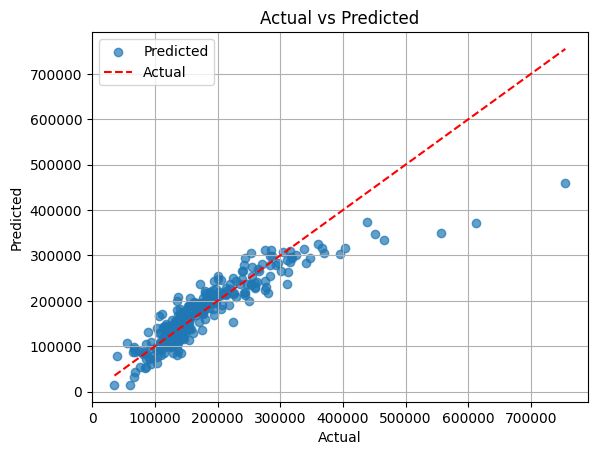

In [67]:
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


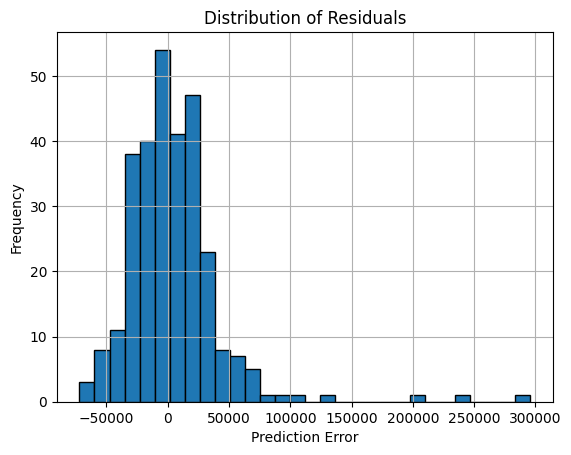

In [68]:
residuals = y_test - predictions
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()